# Codigo del laplaciano de una imagen
Leonardo Coronado Arvayo

In [4]:
import numpy as np
#se pide el tamaño de la matriz
n=5
#se define una matriz de zeros de nxn
a=np.zeros(shape=(n,n))
ax=np.zeros(shape=(n,n))
ay=np.zeros(shape=(n,n))
a2x=np.zeros(shape=(n,n))
a2y=np.zeros(shape=(n,n))
axy=np.zeros(shape=(n,n))
der=np.zeros(shape=(n,n))
lapx=np.zeros(shape=(n,n))
derx=np.zeros(shape=(n,n))
dery=np.zeros(shape=(n,n))
sobelx=np.zeros(shape=(n,n))
sobely=np.zeros(shape=(n,n))
#se define sigma (dev estandar)
sigx=1
sigy=1

for u in range(0,n):
    for v in range(0,n):
        dx=(int(n/2)-u)
        dy=(int(n/2)-v)
        a[u,v]=np.exp( - ( ( (dx**2)/(2*(sigx**2)) )+( (dy**2)/(2*(sigy**2)) ) ) )
        ax[u,v]= (2*dx/(sigx**2))*a[u,v]
        ay[u,v]= (2*dy/(sigy**2))*a[u,v]
        a2x[u,v]= (   ( (dx**2/sigx**2)-1)/(2*(sigx**2)*(sigy**2) )   )*a[u,v]
        a2y[u,v]= (   ( (dy**2/sigy**2)-1)/(2*(sigx**2)*(sigy**2) )   )*a[u,v]
        axy[u,v]=( (dy*dy)/( 2*(sigx**3)*(sigy**3) )   )*a[u,v]
total=np.sum(a)
a=a/total
a2x=a2x/total
a2y=a2y/total
axy=axy/total

In [2]:
import cv2
import warnings
from IPython.display import Image
warnings.filterwarnings("ignore")
#exportamos la imagen en grises
img = cv2.imread('lena.jpg',0)
# img=sk.io.imread('lena.jpg')

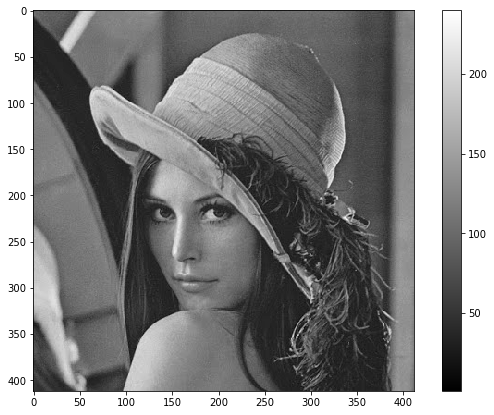

In [3]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10,7))
fig = plt.imshow(img)
fig.set_cmap('gray')
plt.colorbar()
plt.show()


In [193]:
L=img.shape
x=L[0]
y=L[1]
smoth=np.zeros(shape=(x,y))
ix=np.zeros(shape=(x,y))
iy=np.zeros(shape=(x,y))
i2x=np.zeros(shape=(x,y))
i2y=np.zeros(shape=(x,y))
ixy=np.zeros(shape=(x,y))

for j in range(0,x):
    for i in range(0,y):
        for u in range(0,n):
            for v in range(0,n):
                d1=(int(n/2)-u)
                d2=(int(n/2)-v)
                if (d1+j)>=0 and (d2+i)>=0 and (d1+j)<x and (d2+i)<y:
                    ix[j,i]=ix[j,i]+ax[d1,d2]*img[d1+j,d2+i]
                    iy[j,i]=iy[j,i]+ay[d1,d2]*img[d1+j,d2+i]
                    i2x[j,i]=i2x[j,i]+a2x[d1,d2]*img[d1+j,d2+i]
                    i2y[j,i]=i2y[j,i]+a2y[d1,d2]*img[d1+j,d2+i]
                    ixy[j,i]=ixy[j,i]+axy[d1,d2]*img[d1+j,d2+i]
                    smoth[j,i]= smoth[j,i]+a[d1,d2]*img[d1+j,d2+i]

In [194]:
normix = np.linalg.norm(ix)
normiy = np.linalg.norm(iy)
normi2x = np.linalg.norm(i2x)
normi2y = np.linalg.norm(i2y)
normixy = np.linalg.norm(ixy)
normsmooth=np.linalg.norm(smoth)
ix = ix/normix
iy = ix/normiy
i2x = ix/normi2x
i2y = ix/normi2y
ixy = ix/normixy
smoth=smoth/normsmooth

# laplaciano de la imagen

In [195]:
#ventana 
vtam=3
ven=np.zeros(shape=(vtam,vtam))
sigx=0.5
sigy=0.5
for u in range(0,vtam):
    for v in range(0,vtam):
        dx=(int(vtam/2)-u)
        dy=(int(vtam/2)-v)
        ven[u,v]=np.exp( - ( ( (dx**2)/(2*(sigx**2)) )+( (dy**2)/(2*(sigy**2)) ) ) )
tv=np.sum(ven)
ven=ven/tv

In [275]:
L=img.shape
x=L[0]
y=L[1]
vent=np.zeros(shape=(2,1))
m=np.zeros(shape=(2,2))                    
listR=[]
corner=np.zeros(shape=(x,y))
ventana=np.zeros(shape=(3,3))
ventana1=np.zeros(shape=(3,3))

for j in range(0,x):
    for i in range(0,y):
        mx=0
        my=0
        mxy=0
        for u in range(0,vtam):
            for v in range(0,vtam):
                d1=(int(vtam/2)-u)
                d2=(int(vtam/2)-v)
                if (d1+j)>=0 and (d2+i)>=0 and (d1+j)<x and (d2+i)<y:
                    #mx=mx+ix[d1+j,d2+i]
                    #my=mx+iy[d1+j,d2+i]  
                    mx=mx+i2x[d1+j,d2+i]#*ven[d1,d2]
                    my=mx+i2y[d1+j,d2+i]#*ven[d1,d2] 
                    mxy=mxy+ixy[d1+j,d2+i]#*ven[d1,d2]
                    #ventana[d1,d2]=(I2x[d1+j,d2+i]**2+I2y[d1+j,d2+i]**2+(2*Ixy[d1+j,d2+i])**2)**(0.5)
                    ventana1[d1,d2]=ix[d1+j,d2+i]+iy[d1+j,d2+i]#*ven[d1,d2]
                    ventana[d1,d2]=smoth[d1+j,d2+i]
  
        m[0,0]=mx
        m[0,1]=mxy
        m[1,0]=mxy
        m[1,1]=my
        deter=np.linalg.det(m)
        trace=np.trace(m)
        R=deter-0.04*(trace**2)
        listR.append(R)
        if R>(2*6.854822339528082e-11) and ventana[d1,d2]==np.amax(ventana) and ventana1[d1,d2]==np.amin(ventana1):
            corner[d1+j,d2+i]=1
        else:
            corner[j,i]=0

In [276]:
print(np.std(listR),np.amax(listR), np.mean(listR),np.amin(listR))

3.075943494353991e-10 9.564955215148473e-09 6.854822339528082e-11 -1.42100349243153e-11


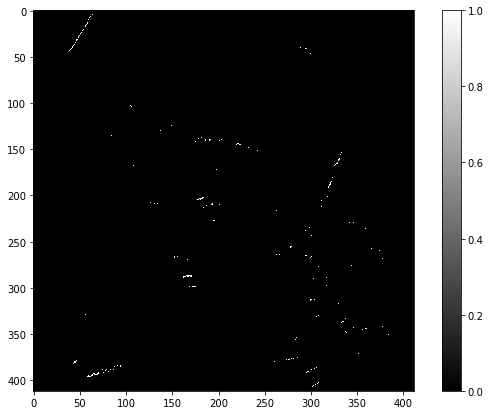

In [277]:
plt.figure(1, figsize=(10,7))
fig = plt.imshow(corner)
fig.set_cmap('gray')
plt.colorbar()
plt.show()

In [278]:
corner = cv2.dilate(corner,None)


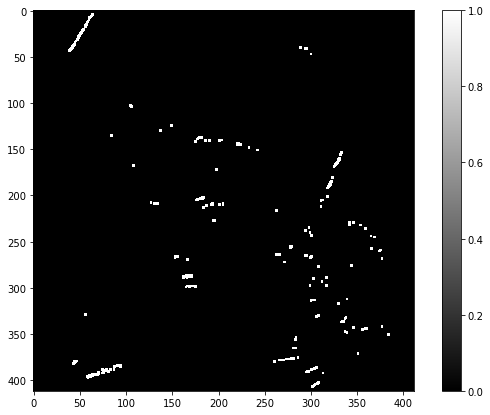

In [279]:
plt.figure(1, figsize=(10,7))
fig = plt.imshow(corner)
fig.set_cmap('gray')
plt.colorbar()
plt.show()

In [235]:
dst = cv2.cornerHarris(img,3,3,0.04)


In [236]:
dst = cv2.dilate(dst,None)



In [237]:
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

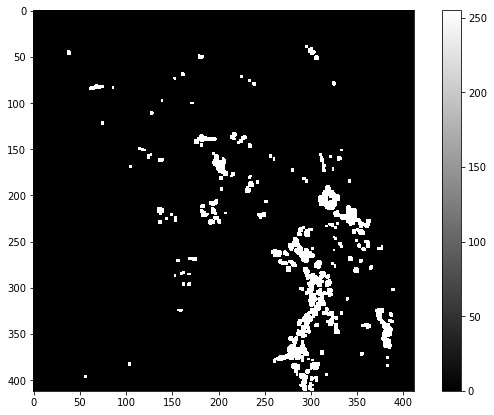

In [238]:
plt.figure(1, figsize=(10,7))
fig = plt.imshow(dst)
fig.set_cmap('gray')
plt.colorbar()
plt.show()

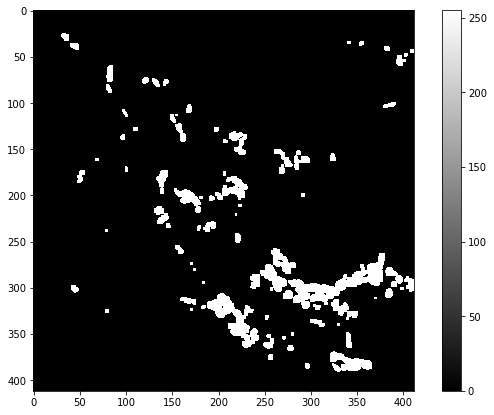

In [277]:
dst = cv2.cornerHarris(img.T,5,5,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
plt.figure(1, figsize=(10,7))
fig = plt.imshow(dst)
fig.set_cmap('gray')
plt.colorbar()
plt.show()

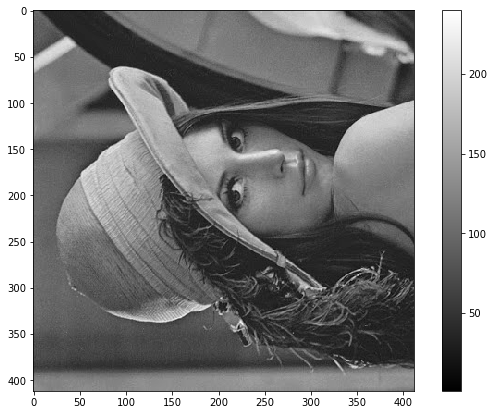

In [279]:
plt.figure(1, figsize=(10,7))
fig = plt.imshow(img.T)
fig.set_cmap('gray')
plt.colorbar()
plt.show()